In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-show/netflix_titles.csv


In [2]:
import pandas as pd

# Load the dataset
#df=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
#df.head()

netflix_df='/kaggle/input/netflix-show/netflix_titles.csv'
df=pd.read_csv(netflix_df)


In [3]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [4]:
df['director']=df['director'].fillna('Unknown')

In [5]:
df.isna().sum()

show_id           0
type              0
title             0
director          0
cast            825
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [6]:
for a in ['cast','country','date_added','rating','duration']:
    df[a] = df[a].fillna(df[a].mode()[0])

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\nColumn Data Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isna().sum())
print("\n Description for the dataset:\n",df.describe())

Rows: 8807, Columns: 12

Column Data Types:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Missing Values:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

 Description for the dataset:
        release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [9]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')

In [10]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [11]:
# Initial exploration
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData types and missing values:")
print(df.info())
print("\nDescriptive statistics for numeric columns:")
print(df.select_dtypes(include='number').describe())

Dataset shape: (8807, 12)

First 5 rows:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                 David Attenborough  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                 David Attenborough  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24   

In [12]:
df['date']=df['date_added'].dt.day
df['month']=df['date_added'].dt.month
df['year']=df['date_added'].dt.year
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
date                     int32
month                    int32
year                     int32
dtype: object

In [13]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,David Attenborough,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",20,11,2019
8803,s8804,TV Show,Zombie Dumb,Unknown,David Attenborough,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",1,7,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,1,11,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",11,1,2020


<Axes: title={'center': 'Content Type Distribution'}, xlabel='type'>

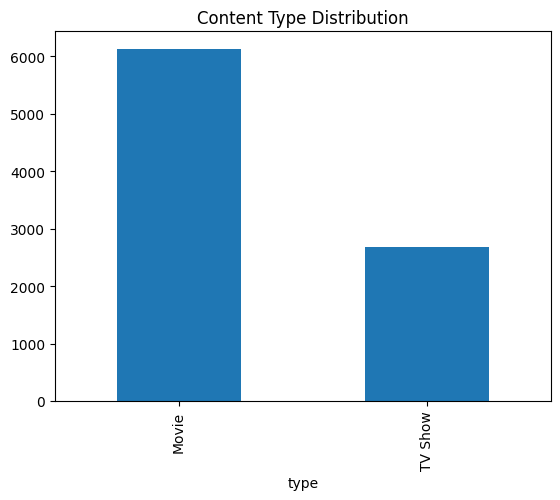

In [14]:
df['type'].value_counts().plot(kind='bar', title='Content Type Distribution')


In [15]:
top_countries = df['country'].value_counts().head(10)
print("Top 10 Countries by Number of Titles:\n", top_countries)

Top 10 Countries by Number of Titles:
 country
United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


understaqnding the number of rows and columns

<Axes: title={'center': 'Top 10 Countries'}, ylabel='country'>

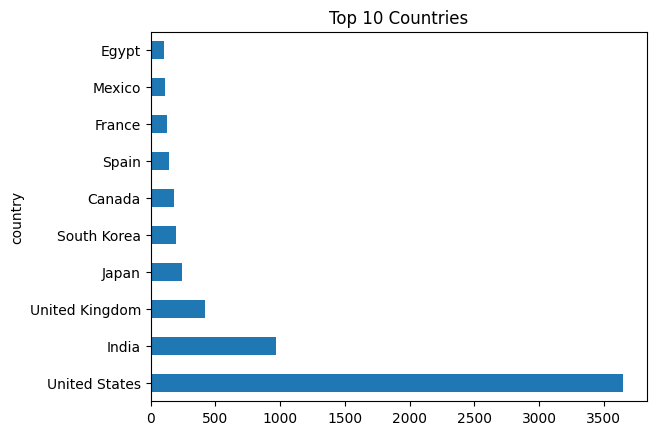

In [16]:
df['country'].value_counts().head(10).plot(kind='barh', title='Top 10 Countries')

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from prophet import Prophet

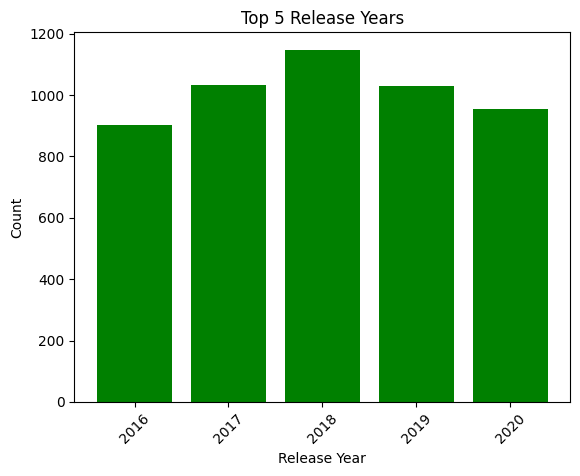

In [18]:
top_5_years = df['release_year'].value_counts().nlargest(5)  
plt.bar(top_5_years.index, top_5_years.values, color='Green')  
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Top 5 Release Years')
plt.xticks(rotation=45)  
plt.show()

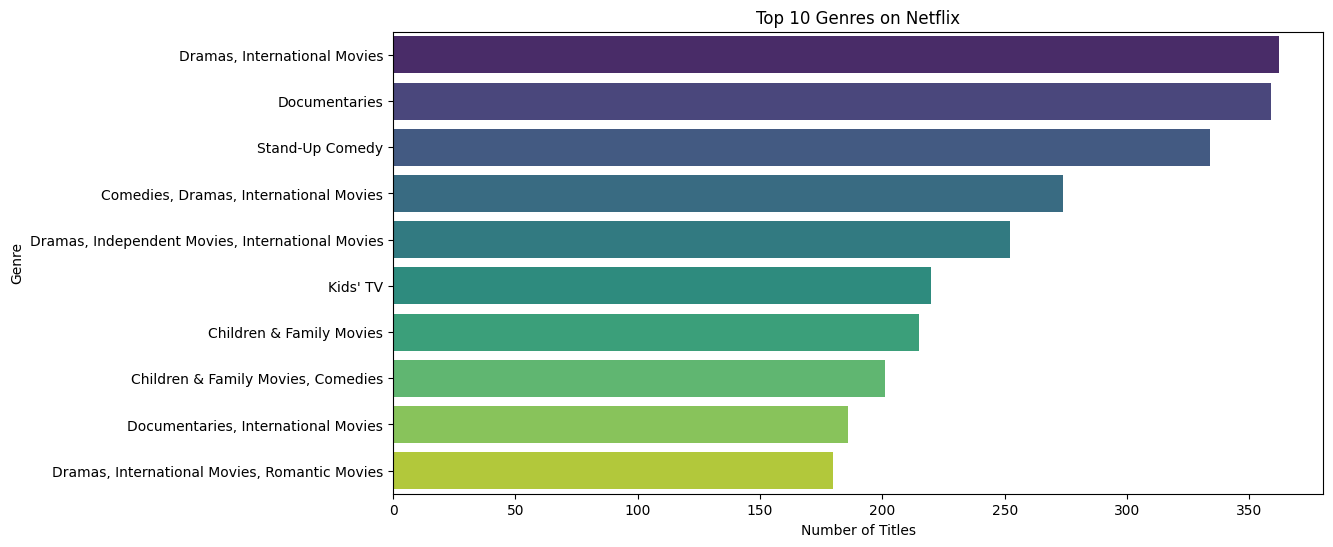

In [19]:
plt.figure(figsize=(12, 6))
top_genres = df['listed_in'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

In [20]:
top_directors = df['director'].value_counts().head(10)
print(top_directors)

director
Unknown                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Name: count, dtype: int64


In [21]:
actor_series = df['cast'].dropna().str.split(', ')
flat_actor_list = [actor for sublist in actor_series for actor in sublist]
top_actors = Counter(flat_actor_list).most_common(10)

for actor, count in top_actors:
    print(f"{actor}: {count}")

David Attenborough: 845
Anupam Kher: 43
Shah Rukh Khan: 35
Julie Tejwani: 33
Naseeruddin Shah: 32
Takahiro Sakurai: 32
Rupa Bhimani: 31
Akshay Kumar: 30
Om Puri: 30
Yuki Kaji: 29


month
1     748
2     563
3     742
4     764
5     632
6     728
7     827
8     755
9     770
10    760
11    705
12    813
Name: count, dtype: int64


<Axes: title={'center': 'Releases by Month'}, ylabel='Count'>

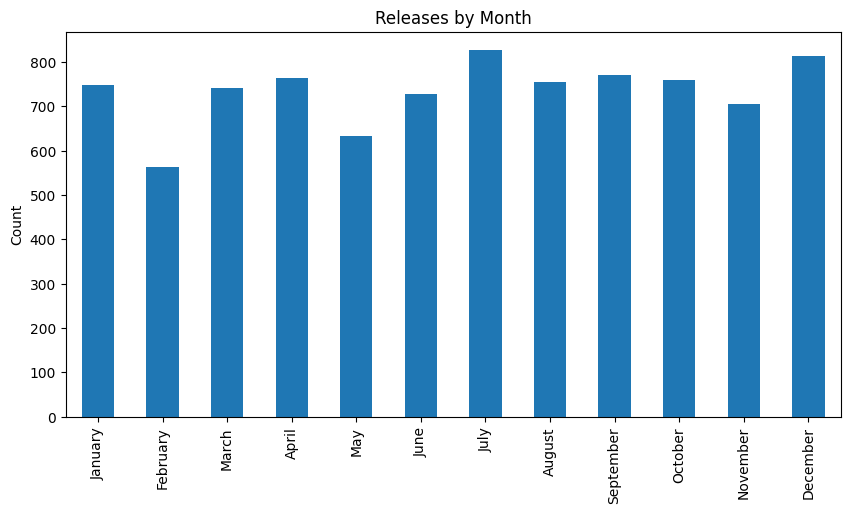

In [22]:
top_month = df['month'].value_counts().sort_index()
print(top_month)

import calendar
top_month.index = [calendar.month_name[i] for i in top_month.index]

top_month.plot(kind='bar', title='Releases by Month', figsize=(10,5), ylabel='Count')

rating
TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


<Axes: title={'center': 'Content Ratings Distribution'}, xlabel='rating', ylabel='Count'>

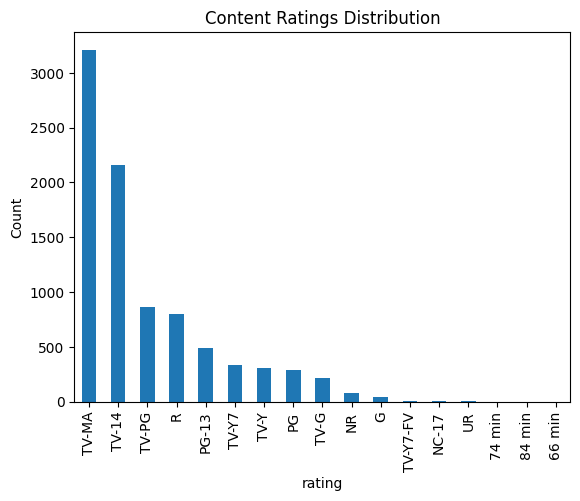

In [23]:
avg_rating_counts = df['rating'].value_counts()
print(avg_rating_counts)

avg_rating_counts.plot(kind='bar', title='Content Ratings Distribution', ylabel='Count')

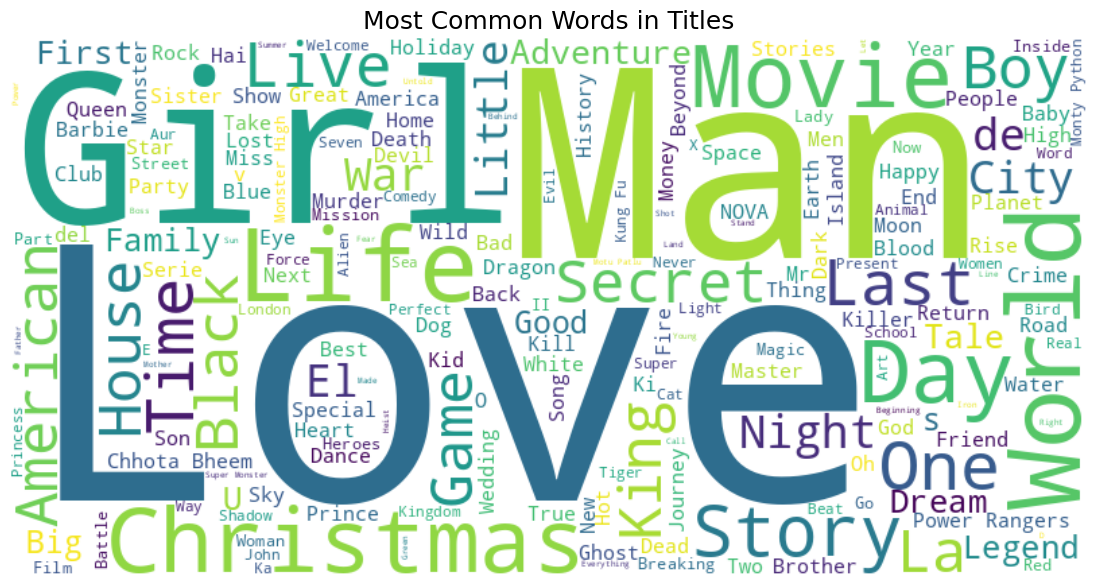

In [24]:
title_text = ' '.join(df['title'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Titles', fontsize=18)
plt.show()

Average Movie Duration: 99.53 minutes


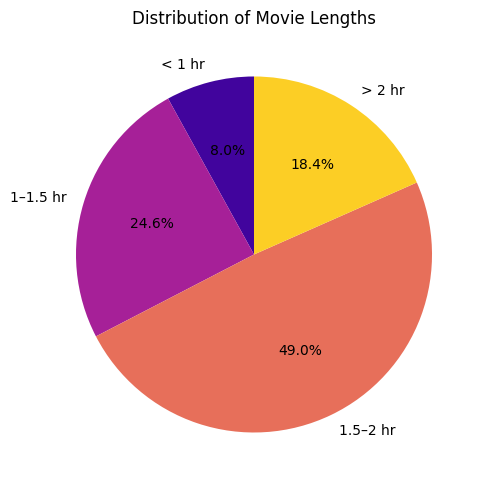

In [25]:
# Filter movies
df_movies = df[df['type'] == 'Movie'].copy()

# Convert the 'duration' column to numeric minutes
df_movies['duration_mins'] = pd.to_numeric(df_movies['duration'].str.extract('(\d+)')[0])

# Calculate the average movie duration
average_duration = df_movies['duration_mins'].mean()
print(f"Average Movie Duration: {average_duration:.2f} minutes")

# Categorize movie lengths into bins
bins = [0, 60, 90, 120, 200]
labels = ['< 1 hr', '1–1.5 hr', '1.5–2 hr', '> 2 hr']
df_movies['length_category'] = pd.cut(df_movies['duration_mins'], bins=bins, labels=labels)

# Get the distribution of movie lengths
length_dist = df_movies['length_category'].value_counts().sort_index()

# Plot the distribution of movie lengths
plt.figure(figsize=(5,5))
plt.pie(length_dist, labels=length_dist.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.plasma(np.linspace(0.1, 0.9, len(length_dist))))
plt.title('Distribution of Movie Lengths')
plt.tight_layout()
plt.show()

In [26]:
#duplicate 
print("number of duplicate rows:",df.duplicated().sum())
# Group and Count of missing (null) values in each column
print("Missing values per column:\n", df.isnull().sum())


number of duplicate rows: 0
Missing values per column:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
date            0
month           0
year            0
dtype: int64


In [27]:
##2. Structuring
# Convert 'date_added' to datetime
#df['date_added'] = pd.to_datetime(df['date_added'],format='mixed')
#df['date_added']
# Separate 'duration' into numeric value and unit (e.g., '90 min' → 90, 'min')
df[['duration_value', 'duration_unit']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
df[['duration_value', 'duration_unit']]
# Convert duration_value to numeric
df['duration_value'] = pd.to_numeric(df['duration_value'])
df['duration_value'] 
# View Resulting columns
print(df[['duration_value', 'duration_unit']])

      duration_value duration_unit
0                 90           min
1                  2       Seasons
2                  1        Season
3                  1        Season
4                  2       Seasons
...              ...           ...
8802             158           min
8803               2       Seasons
8804              88           min
8805              88           min
8806             111           min

[8807 rows x 2 columns]


In [28]:

 #Cleaning
# Check for duplicate rows
print("Duplicate rows before:", df.duplicated().sum())

# Drop duplicate rows if any
df = df.drop_duplicates()

# Drop description column because it will not be used
df = df.drop(columns=['description'])

Duplicate rows before: 0


In [29]:
# Impute Director values by using relationship between cast and director

# Create dir_cast column
df['dir_cast'] = df['director'].fillna('') + '---' + df['cast'].fillna('')
# Count repeated director-cast pairs
counts = df['dir_cast'].value_counts()
filtered_counts = counts[counts >= 3]
filtered_values = filtered_counts.index.tolist()


In [30]:
lst_dir_cast = list(filtered_values)


In [31]:
# Build mapping dictionary
dict_direcast = {}
for pair in filtered_values:
    director, cast = pair.split('---')
    dict_direcast[director] = cast

# Fill missing directors based on cast
for director, cast in dict_direcast.items():
    df.loc[(df['director'].isna()) & (df['cast'] == cast), 'director'] = director

# Assign "Not Given" to all other missing directors
df.loc[df['director'].isna(), 'director'] = 'Not Given'

# Use directors to fill missing countries
directors = df['director']
countries = df['country']
dir_cntry = dict(zip(directors, countries))

for director, country in dir_cntry.items():
    df.loc[(df['country'].isna()) & (df['director'] == director), 'country'] = country

# Assign "Not Given" to all other missing countries
df.loc[df['country'].isna(), 'country'] = 'Not Given'

# Assign "Not Given" to all missing cast values
df.loc[df['cast'].isna(), 'cast'] = 'Not Given'

# Drop rows with nulls in critical fields
df.drop(df[df['date_added'].isna()].index, axis=0, inplace=True)
df.drop(df[df['rating'].isna()].index, axis=0, inplace=True)
df.drop(df[df['duration'].isna()].index, axis=0, inplace=True)
